# Predicting Breast Cancer Status

🎯 On this notebook, I am going to create a classification task using machine learning techniques. The main goal is to be able to predict the chances of survival for someone with breast cancer.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate, \
    train_test_split, learning_curve, RepeatedKFold

In [2]:
# Reads the data as dataframe and shows first 5 lines
data = pd.read_csv("../raw_data/Breast_Cancer.csv")
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [3]:
data.shape

(4024, 16)

In [4]:
# Creates a copy of original data to work on
data_clean = data.copy()

## Pre-processing

In [5]:
# Checks for missing values
data_clean.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [6]:
# Checking for duplicates
data_clean.duplicated().sum()

1

In [7]:
# Dropping duplicates
data_clean.drop_duplicates(inplace=True)
data_clean.shape

(4023, 16)

In [8]:
data_clean.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [9]:
# Fixing typo on T stage column name
data_clean.rename(columns = {'T Stage ':'T Stage'}, inplace = True)

### Numerical features

In [10]:
# Gives more details of the numeric columns
data_clean.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000
mean,53.969923,30.477007,14.358439,4.158837,71.301765
std,8.963118,21.121253,8.100241,5.109724,22.923009
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [11]:
num_features = data_clean.select_dtypes(include="int64")
num_features

# Creates a copy of original numerical features to work on
num_scaled = num_features.copy()

In [12]:
num_scaled.columns

Index(['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive',
       'Survival Months'],
      dtype='object')

In [13]:
num_scaled.shape

(4023, 5)

In [14]:
num_scaled

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
0,68,4,24,1,60
1,50,35,14,5,62
2,58,63,14,7,75
3,58,18,2,1,84
4,47,41,3,1,50
...,...,...,...,...,...
4019,62,9,1,1,49
4020,56,46,14,8,69
4021,68,22,11,3,69
4022,58,44,11,1,72


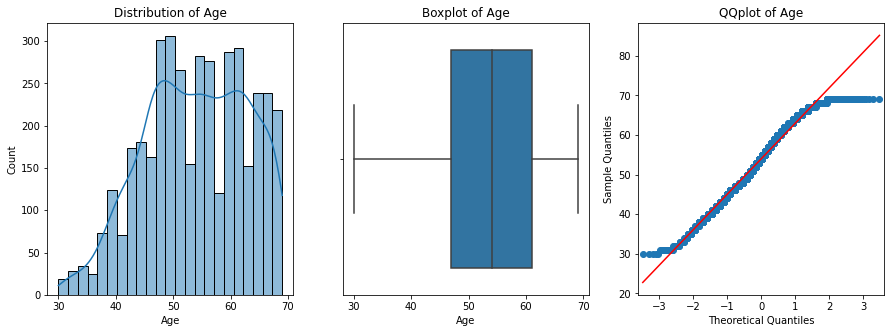

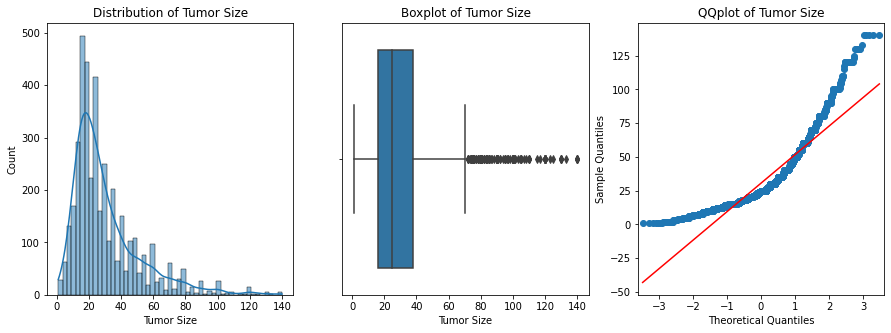

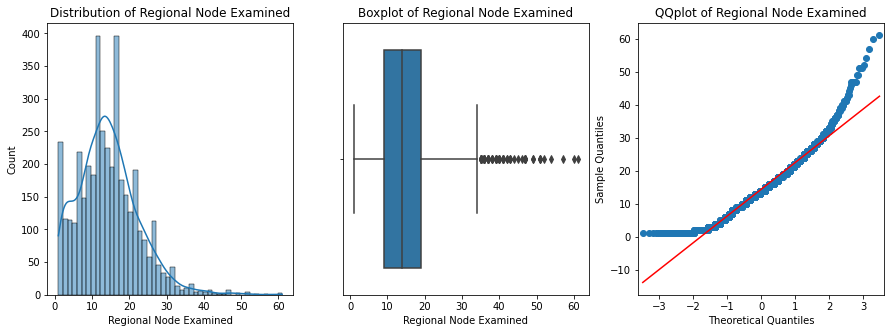

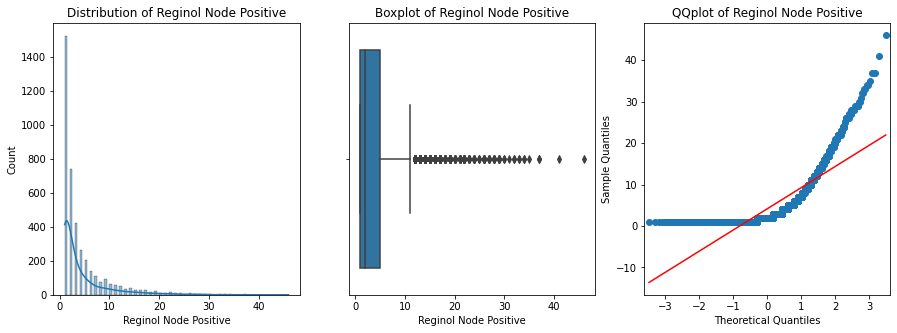

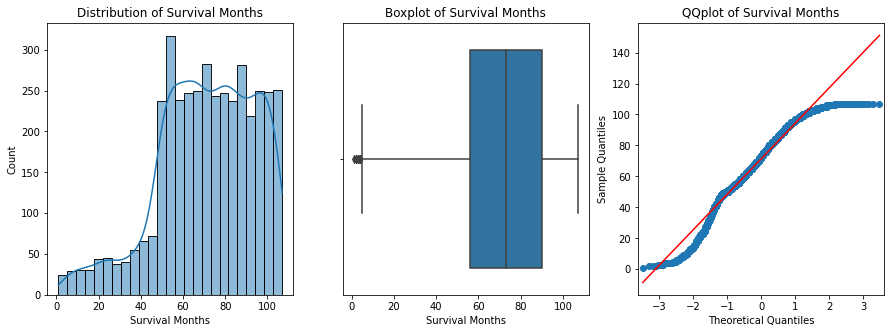

In [15]:
## Shows distribution

for numerical_feature in num_features:
    
    fig, ax = plt.subplots(1,3, figsize = (15,5))
    
    ax[0].set_title(f"Distribution of {numerical_feature}")
    sns.histplot(x = num_features[numerical_feature], kde = True, ax = ax[0])
    
    ax[1].set_title(f"Boxplot of {numerical_feature}")
    sns.boxplot(x = num_features[numerical_feature], ax = ax[1])
    
    ax[2].set_title(f"QQplot of {numerical_feature}")
    qqplot(num_features[numerical_feature], line='s', ax = ax[2])

In [16]:
#The feature Age has no outliers. scale using StandardScale
std_scaler = StandardScaler()
num_scaled[["Age"]]= std_scaler.fit_transform(num_scaled[["Age"]])
num_scaled

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
0,1.565507,4,24,1,60
1,-0.442973,35,14,5,62
2,0.449685,63,14,7,75
3,0.449685,18,2,1,84
4,-0.777719,41,3,1,50
...,...,...,...,...,...
4019,0.896014,9,1,1,49
4020,0.226520,46,14,8,69
4021,1.565507,22,11,3,69
4022,0.449685,44,11,1,72


In [17]:
# Remaining numerical features are showing outliers and no-normal distribution. Apply RobustScaler
rob_scaler = RobustScaler()
num_scaled[['Tumor Size', 'Regional Node Examined', 'Reginol Node Positive','Survival Months']] = rob_scaler.fit_transform(
    num_scaled[['Tumor Size', 'Regional Node Examined', 'Reginol Node Positive','Survival Months']])
num_scaled

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
0,1.565507,-0.954545,1.0,-0.25,-0.382353
1,-0.442973,0.454545,0.0,0.75,-0.323529
2,0.449685,1.727273,0.0,1.25,0.058824
3,0.449685,-0.318182,-1.2,-0.25,0.323529
4,-0.777719,0.727273,-1.1,-0.25,-0.676471
...,...,...,...,...,...
4019,0.896014,-0.727273,-1.3,-0.25,-0.705882
4020,0.226520,0.954545,0.0,1.50,-0.117647
4021,1.565507,-0.136364,-0.3,0.25,-0.117647
4022,0.449685,0.863636,-0.3,-0.25,-0.029412


### Categorical features

In [18]:
#Selecting categorical columns only
cat_features = data_clean.select_dtypes(include ='object') 
cat_features

# Creates a copy of original categorical features to work on
cat_scaled = cat_features.copy()

In [19]:
cat_scaled.shape

(4023, 11)

In [20]:
# Checking if binary
print(cat_scaled.nunique())

for cat_feat in cat_scaled.columns:
    print("-"*50)
    print(f"Number of unique occurences for the categorical feature {cat_feat}")
    display(cat_scaled[cat_feat].value_counts())

Race                   3
Marital Status         5
T Stage                4
N Stage                3
6th Stage              5
differentiate          4
Grade                  4
A Stage                2
Estrogen Status        2
Progesterone Status    2
Status                 2
dtype: int64
--------------------------------------------------
Number of unique occurences for the categorical feature Race


White    3412
Other     320
Black     291
Name: Race, dtype: int64

--------------------------------------------------
Number of unique occurences for the categorical feature Marital Status


Married      2642
Single        615
Divorced      486
Widowed       235
Separated      45
Name: Marital Status, dtype: int64

--------------------------------------------------
Number of unique occurences for the categorical feature T Stage


T2    1786
T1    1602
T3     533
T4     102
Name: T Stage, dtype: int64

--------------------------------------------------
Number of unique occurences for the categorical feature N Stage


N1    2731
N2     820
N3     472
Name: N Stage, dtype: int64

--------------------------------------------------
Number of unique occurences for the categorical feature 6th Stage


IIA     1304
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: 6th Stage, dtype: int64

--------------------------------------------------
Number of unique occurences for the categorical feature differentiate


Moderately differentiated    2350
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: differentiate, dtype: int64

--------------------------------------------------
Number of unique occurences for the categorical feature Grade


2                        2350
3                        1111
1                         543
 anaplastic; Grade IV      19
Name: Grade, dtype: int64

--------------------------------------------------
Number of unique occurences for the categorical feature A Stage


Regional    3931
Distant       92
Name: A Stage, dtype: int64

--------------------------------------------------
Number of unique occurences for the categorical feature Estrogen Status


Positive    3754
Negative     269
Name: Estrogen Status, dtype: int64

--------------------------------------------------
Number of unique occurences for the categorical feature Progesterone Status


Positive    3325
Negative     698
Name: Progesterone Status, dtype: int64

--------------------------------------------------
Number of unique occurences for the categorical feature Status


Alive    3407
Dead      616
Name: Status, dtype: int64

In [21]:
ohe_binary = OneHotEncoder(sparse=False, drop='if_binary') # Instanciate encoder

cat_scaled[["A Stage", "Estrogen Status", "Progesterone Status"]] = ohe_binary.fit_transform(
    cat_scaled[["A Stage", "Estrogen Status", "Progesterone Status"]]) # Fit encoder and tranform

cat_scaled.head()

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
0,White,Married,T1,N1,IIA,Poorly differentiated,3,1.0,1.0,1.0,Alive
1,White,Married,T2,N2,IIIA,Moderately differentiated,2,1.0,1.0,1.0,Alive
2,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,1.0,1.0,1.0,Alive
3,White,Married,T1,N1,IIA,Poorly differentiated,3,1.0,1.0,1.0,Alive
4,White,Married,T2,N1,IIB,Poorly differentiated,3,1.0,1.0,1.0,Alive


In [22]:
ohe = OneHotEncoder(sparse = False) # Instantiate encoder

ohe.fit(cat_scaled[['Race']]) # Fit encoder

race_encoded = ohe.transform(cat_scaled[['Race']]) # Encode Race

cat_scaled[ohe.categories_[0]] = race_encoded # categories_ stores the order of encoded column names

cat_scaled.drop(columns=['Race'], inplace = True) # Drop original column

cat_scaled.head()

,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status,Black,Other,White
0,Married,T1,N1,IIA,Poorly differentiated,3,1.0,1.0,1.0,Alive,0.0,0.0,1.0
1,Married,T2,N2,IIIA,Moderately differentiated,2,1.0,1.0,1.0,Alive,0.0,0.0,1.0
2,Divorced,T3,N3,IIIC,Moderately differentiated,2,1.0,1.0,1.0,Alive,0.0,0.0,1.0
3,Married,T1,N1,IIA,Poorly differentiated,3,1.0,1.0,1.0,Alive,0.0,0.0,1.0
4,Married,T2,N1,IIB,Poorly differentiated,3,1.0,1.0,1.0,Alive,0.0,0.0,1.0


In [23]:
ohe.fit(cat_scaled[['Marital Status']]) # Fit encoder

marital_encoded = ohe.transform(cat_scaled[['Marital Status']]) # Encode Race

cat_scaled[ohe.categories_[0]] = marital_encoded # categories_ stores the order of encoded column names

cat_scaled.drop(columns=['Marital Status'], inplace = True) # Drop original column

cat_scaled.head()

,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status,Black,Other,White,Divorced,Married,Separated,Single,Widowed
0,T1,N1,IIA,Poorly differentiated,3,1.0,1.0,1.0,Alive,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,T2,N2,IIIA,Moderately differentiated,2,1.0,1.0,1.0,Alive,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,T3,N3,IIIC,Moderately differentiated,2,1.0,1.0,1.0,Alive,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,T1,N1,IIA,Poorly differentiated,3,1.0,1.0,1.0,Alive,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,T2,N1,IIB,Poorly differentiated,3,1.0,1.0,1.0,Alive,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [24]:
ohe.fit(cat_scaled[['T Stage']]) # Fit encoder

T_Stage_encoded = ohe.transform(cat_scaled[['T Stage']]) # Encode Race

cat_scaled[ohe.categories_[0]] = T_Stage_encoded # categories_ stores the order of encoded column names

cat_scaled.drop(columns=['T Stage'], inplace = True) # Drop original column

cat_scaled.head()

,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status,Black,Other,White,Divorced,Married,Separated,Single,Widowed,T1,T2,T3,T4
0,N1,IIA,Poorly differentiated,3,1.0,1.0,1.0,Alive,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,N2,IIIA,Moderately differentiated,2,1.0,1.0,1.0,Alive,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,N3,IIIC,Moderately differentiated,2,1.0,1.0,1.0,Alive,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,N1,IIA,Poorly differentiated,3,1.0,1.0,1.0,Alive,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,N1,IIB,Poorly differentiated,3,1.0,1.0,1.0,Alive,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [25]:
ohe.fit(cat_scaled[['N Stage']]) # Fit encoder

n_stage_encoded = ohe.transform(cat_scaled[['N Stage']]) # Encode Race

cat_scaled[ohe.categories_[0]] = n_stage_encoded # categories_ stores the order of encoded column names

cat_scaled.drop(columns=['N Stage'], inplace = True) # Drop original column

cat_scaled.head()

,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status,Black,Other,White,...,Separated,Single,Widowed,T1,T2,T3,T4,N1,N2,N3
0,IIA,Poorly differentiated,3,1.0,1.0,1.0,Alive,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,IIIA,Moderately differentiated,2,1.0,1.0,1.0,Alive,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,IIIC,Moderately differentiated,2,1.0,1.0,1.0,Alive,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,IIA,Poorly differentiated,3,1.0,1.0,1.0,Alive,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,IIB,Poorly differentiated,3,1.0,1.0,1.0,Alive,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [26]:
ohe.fit(cat_scaled[['6th Stage']]) # Fit encoder

six_Stage_encoded = ohe.transform(cat_scaled[['6th Stage']]) # Encode Race

cat_scaled[ohe.categories_[0]] = six_Stage_encoded # categories_ stores the order of encoded column names

cat_scaled.drop(columns=['6th Stage'], inplace = True) # Drop original column

cat_scaled.head()

,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status,Black,Other,White,Divorced,...,T3,T4,N1,N2,N3,IIA,IIB,IIIA,IIIB,IIIC
0,Poorly differentiated,3,1.0,1.0,1.0,Alive,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Moderately differentiated,2,1.0,1.0,1.0,Alive,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Moderately differentiated,2,1.0,1.0,1.0,Alive,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,Poorly differentiated,3,1.0,1.0,1.0,Alive,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Poorly differentiated,3,1.0,1.0,1.0,Alive,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [27]:
ohe.fit(cat_scaled[['differentiate']]) # Fit encoder

differentiate_encoded = ohe.transform(cat_scaled[['differentiate']]) # Encode Race

cat_scaled[ohe.categories_[0]] = differentiate_encoded # categories_ stores the order of encoded column names

cat_scaled.drop(columns=['differentiate'], inplace = True) # Drop original column

cat_scaled.head()

,Grade,A Stage,Estrogen Status,Progesterone Status,Status,Black,Other,White,Divorced,Married,...,N3,IIA,IIB,IIIA,IIIB,IIIC,Moderately differentiated,Poorly differentiated,Undifferentiated,Well differentiated
0,3,1.0,1.0,1.0,Alive,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,1.0,1.0,1.0,Alive,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,1.0,1.0,1.0,Alive,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,3,1.0,1.0,1.0,Alive,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3,1.0,1.0,1.0,Alive,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
ohe.fit(cat_scaled[['Grade']]) # Fit encoder

grade_encoded = ohe.transform(cat_scaled[['Grade']]) # Encode Race

cat_scaled[ohe.categories_[0]] = grade_encoded # categories_ stores the order of encoded column names

cat_scaled.drop(columns=['Grade'], inplace = True) # Drop original column

cat_scaled.head()

,A Stage,Estrogen Status,Progesterone Status,Status,Black,Other,White,Divorced,Married,Separated,...,IIIB,IIIC,Moderately differentiated,Poorly differentiated,Undifferentiated,Well differentiated,anaplastic; Grade IV,1,2,3
0,1.0,1.0,1.0,Alive,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,Alive,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,1.0,Alive,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,1.0,Alive,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,1.0,Alive,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### Enconding target

In [29]:
y = data_clean[["Status"]]
y

,Status
0,Alive
1,Alive
2,Alive
3,Alive
4,Alive
...,...
4019,Alive
4020,Alive
4021,Alive
4022,Alive


In [30]:
# Enconding target
label_encoder = LabelEncoder()

y_scaled = y.copy()
y_scaled['Status'] = label_encoder.fit_transform(y_scaled['Status'])
y_scaled

,Status
0,0
1,0
2,0
3,0
4,0
...,...
4019,0
4020,0
4021,0
4022,0


### Combining scaled features

In [31]:
data_concatenated = pd.concat([num_scaled, cat_scaled, y_scaled], axis = 1)
pd.DataFrame(data_concatenated) # concatenating them all, axis 1 
                      # stands for "columns" stacked side-by-side together

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,A Stage,Estrogen Status,Progesterone Status,Status,Black,...,IIIC,Moderately differentiated,Poorly differentiated,Undifferentiated,Well differentiated,anaplastic; Grade IV,1,2,3,Status
0,1.565507,-0.954545,1.0,-0.25,-0.382353,1.0,1.0,1.0,Alive,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,-0.442973,0.454545,0.0,0.75,-0.323529,1.0,1.0,1.0,Alive,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0.449685,1.727273,0.0,1.25,0.058824,1.0,1.0,1.0,Alive,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.449685,-0.318182,-1.2,-0.25,0.323529,1.0,1.0,1.0,Alive,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,-0.777719,0.727273,-1.1,-0.25,-0.676471,1.0,1.0,1.0,Alive,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,0.896014,-0.727273,-1.3,-0.25,-0.705882,1.0,1.0,1.0,Alive,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4020,0.226520,0.954545,0.0,1.50,-0.117647,1.0,1.0,1.0,Alive,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4021,1.565507,-0.136364,-0.3,0.25,-0.117647,1.0,1.0,0.0,Alive,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4022,0.449685,0.863636,-0.3,-0.25,-0.029412,1.0,1.0,1.0,Alive,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [32]:
X_scaled = data_concatenated.drop(columns="Status")
X_scaled

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,A Stage,Estrogen Status,Progesterone Status,Black,Other,...,IIIB,IIIC,Moderately differentiated,Poorly differentiated,Undifferentiated,Well differentiated,anaplastic; Grade IV,1,2,3
0,1.565507,-0.954545,1.0,-0.25,-0.382353,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.442973,0.454545,0.0,0.75,-0.323529,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.449685,1.727273,0.0,1.25,0.058824,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.449685,-0.318182,-1.2,-0.25,0.323529,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.777719,0.727273,-1.1,-0.25,-0.676471,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,0.896014,-0.727273,-1.3,-0.25,-0.705882,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4020,0.226520,0.954545,0.0,1.50,-0.117647,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4021,1.565507,-0.136364,-0.3,0.25,-0.117647,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4022,0.449685,0.863636,-0.3,-0.25,-0.029412,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


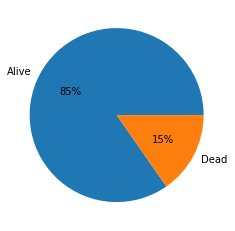

In [33]:
# Checking for unbalenced dataset on target
data = y_scaled['Status'].value_counts()
keys = ['Alive', 'Dead']
  
plt.pie(data, labels=keys, autopct='%.0f%%')
plt.show()

🧩 Target is very imbalanced. Apply random under sampling with imblearn

In [34]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_scaled, y_scaled)


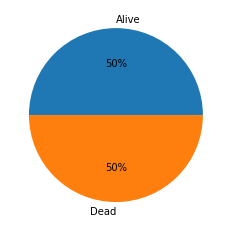

In [35]:
# Checking for unbalenced dataset on target
data = y_rus['Status'].value_counts()
keys = ['Alive', 'Dead']
  
plt.pie(data, labels=keys, autopct='%.0f%%')
plt.show()

## Predicting survival

In [36]:
# Spliting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, 
                                                    test_size = 0.3,
                                                    random_state = 42,
                                                    shuffle = True,
                                                    stratify = None
                                                    )

In [37]:
X_rus.shape, X_train.shape, X_test.shape

((1232, 36), (862, 36), (370, 36))

In [38]:
y_rus.shape, y_train.shape, y_test.shape

((1232, 1), (862, 1), (370, 1))

In [39]:
# Instanciate model
knc = KNeighborsClassifier(n_neighbors = 5)

In [40]:
# Defining model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluating the model
scores = cross_validate(knc, X_train, y_train,
                        cv=cv, # set number of repeated k-folds (here 30 - 10 splits and 3 repeats)
                        scoring=['neg_mean_absolute_error', 'r2'], # scoring
                        n_jobs=-1) # parallelize execution using all processors (makes faster)

In [41]:
knc.fit(X_train, y_train)

/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [42]:
# EVALUATION
knc.score(X_train, y_train)

0.7935034802784223

In [43]:
# EVALUATION
knc.score(X_test, y_test)

0.7189189189189189

/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/

/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/

/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/

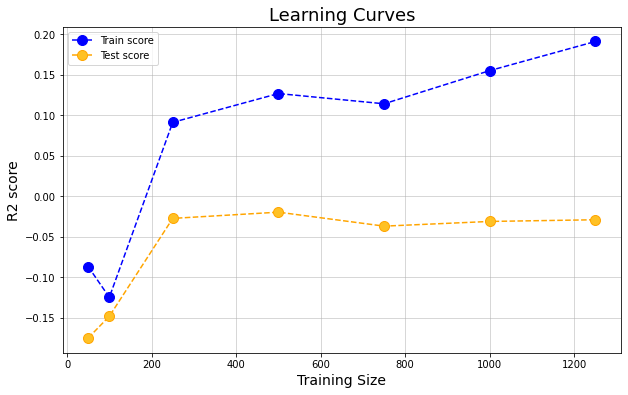

In [44]:
# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = KNeighborsClassifier(n_neighbors = 5),
                                                              X = X_scaled, 
                                                              y = y_scaled, 
                                                              train_sizes = [50,100,250,500,750,1000,1250], 
                                                              cv = 10,
                                                              scoring = 'r2')

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves
with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(10,6))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(train_sizes, train_scores_mean, label = 'Train score',color='blue', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
    ax.plot(train_sizes, test_scores_mean, label = 'Test score',color='orange', linestyle='dashed', marker='o',markerfacecolor='#ffc125', markersize=10)
    # more
    ax.set_title('Learning Curves', fontsize = 18)
    ax.set_xlabel('Training Size', fontsize = 14)
    ax.set_ylabel('R2 score', fontsize = 14)
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)
    ax.legend(loc="best")
    
    plt.show()


✍🏼 Model is not converging. Model is probably overfitting.

### Fine tuning the model

In [45]:
from sklearn.model_selection import GridSearchCV

# Instantiate model
model = KNeighborsClassifier()

# Hyperparameter Grid
k_grid = {'n_neighbors' : [1,5,10,20,50]}

# Instantiate Grid Search
grid = GridSearchCV(model, k_grid, n_jobs=-1,  cv = 10)

# Fit data to Grid Search
grid.fit(X_train, y_train)


/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 20, 50]})

In [46]:
grid.best_params_

{'n_neighbors': 20}

In [47]:
grid.best_score_

0.7285217856188184

In [48]:
model = KNeighborsClassifier()
k_grid = {'n_neighbors' : np.arange(15,25,1),
          'p': [1,2,3]}
grid = GridSearchCV(model, k_grid,
                     cv = 10, n_jobs=-1)
grid.fit(X_train, y_train)

/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/

/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/

/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/

/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/

/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24]),
                         'p': [1, 2, 3]})

In [49]:
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 21, 'p': 3}
0.7493450948944131


In [50]:
# Instanciate model
knc_best = KNeighborsClassifier(n_neighbors = 20)

In [51]:
knc_best.fit(X_train, y_train)

/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=20)

In [52]:
knc.score(X_train, y_train)

0.7935034802784223

/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/

/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/

/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/patricia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neighbors/

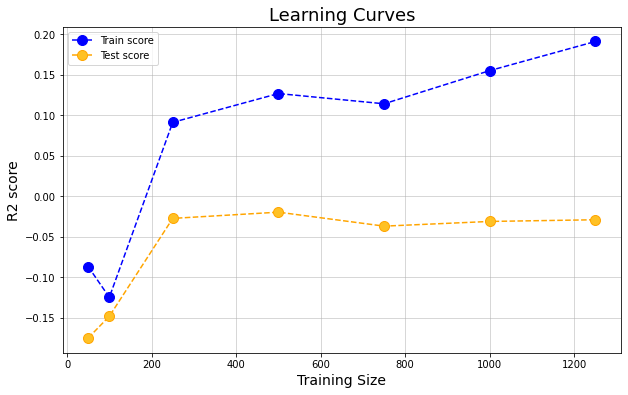

In [53]:
# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = KNeighborsClassifier(n_neighbors = 5),
                                                              X = X_scaled, 
                                                              y = y_scaled, 
                                                              train_sizes = [50,100,250,500,750,1000,1250], 
                                                              cv = 10,
                                                              scoring = 'r2')

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves
with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(10,6))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(train_sizes, train_scores_mean, label = 'Train score',color='blue', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
    ax.plot(train_sizes, test_scores_mean, label = 'Test score',color='orange', linestyle='dashed', marker='o',markerfacecolor='#ffc125', markersize=10)
    # more
    ax.set_title('Learning Curves', fontsize = 18)
    ax.set_xlabel('Training Size', fontsize = 14)
    ax.set_ylabel('R2 score', fontsize = 14)
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)
    ax.legend(loc="best")
    
    plt.show()

In [54]:
knc_best.score(X_test, y_test)

0.7621621621621621